### Benchmarking the Random Forest Regressor on Urban Air Quality dataset

The Random Forest Regressor outperformed the best when it is compared with ARIMA, Support Vector Regressor, XGBoost Regressor, and Decision Tree Regressor. In this code:
- Load the urban air quality dataset
- Create a Random Forest Regressor
- Test against long and short term forecasting
- Plot results

### 1. Load dataset

In [1]:
import invutility as inv
import pandas as pd

# Load dataset using the pandas
df = pd.read_csv('data/urban.csv', parse_dates = ['date'])
df.set_index('date', inplace = True)

# Fill the empty values of PM25 column with median of itself
df.PM25 = df.PM25.fillna(df.PM25.median())

df.head()

,PM25,PM10,NO2,CO,O3,SO2
date,,,,,,
2014-05-01 00:00:00,138.0,159.4,56.3,0.9,50.8,17.2
2014-05-01 01:00:00,124.0,163.9,38.7,0.9,51.1,17.9
2014-05-01 02:00:00,127.0,148.4,55.6,1.0,27.2,16.6
2014-05-01 03:00:00,129.0,145.6,65.7,1.0,9.7,16.7
2014-05-01 04:00:00,119.0,119.3,66.9,1.0,2.0,16.5


### Preparing the dataset for Random Forest Regressor

In [2]:
from sklearn.model_selection import train_test_split

x, y = inv.build_matrix(df.PM25.values, look_back = 20)

days = 250 # Forecasting will be done for next 250 days
x_train = x[:-1 * days]
y_train = y[:-1 * days]

x_test = x[-1 * days:]
y_test = y[-1 * days:]

### Testing against Random Forest Regressor

In [3]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
inv.metrics(y_test, predictions)

MAE: 10.86
RMSE: 15.41


### Plotting the predictions

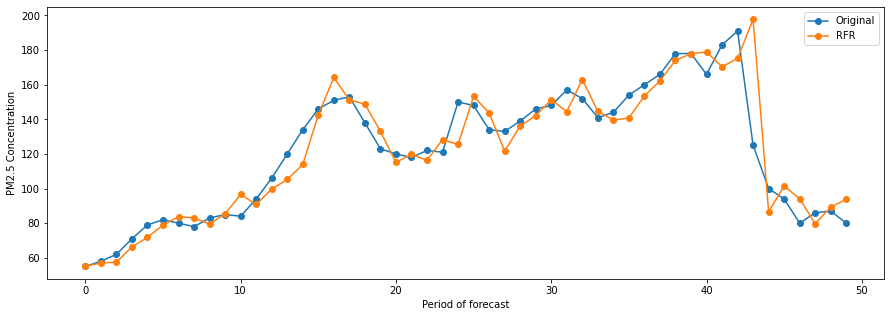

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 5))
plt.plot(y_test[-50:], label = 'Original', marker = 'o')
plt.plot(predictions[-50:], label = 'RFR', marker = 'o')

plt.legend()
plt.xlabel('Period of forecast')
plt.ylabel('PM2.5 Concentration')
plt.show()

Complete